# Illustration of virial coefficient integration

This notebook illustrates how the osmotic second virial coefficient, $B_2$ is calculated by integration over 6-D space.
Duello outputs $\langle e^{-\beta V} -1 \rangle_{\Omega}$ as a function of the mass-center separation, $R$.
The square brackets denote an average over 5-D orientational space, $\Omega$.
To calculate $B_2$ we need to integrate over the last remaining degree of freedom, $R$:
$$
B_2 = -\frac{1}{2} \int_0^{\infty} \langle e^{-\beta V} -1 \rangle_{\Omega} \cdot 4\pi R^2 dR
$$


The first plot illustrates $B_2$ plotted as the cumulative sum with increasing $R$.
To avoid units, we normalize by the hard-sphere contribution which is defined by an operational distance of closest approach, $\sigma$.
We here define $\sigma$ where the cumulative sum is at a maximum.
Of course $\langle e^{-\beta V} -1 \rangle_{\Omega} = \langle e^{-\beta V} \rangle_{\Omega} - 1$ but Duello averages the former as it is [numerically advantageous](https://doc.rust-lang.org/std/primitive.f64.html#method.exp_m1) for large energies.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

We include output from Duello in the Notebook to avoid dependencies.

In [2]:
%%writefile "pmf.dat"
# R/Å F/kT U/kT C/R <exp(-u/kT)-1>
0.10 inf NaN NaN -1.0000e0
0.60 inf NaN NaN -1.0000e0
1.10 inf NaN NaN -1.0000e0
1.60 inf NaN NaN -1.0000e0
2.10 inf NaN NaN -1.0000e0
2.60 inf NaN NaN -1.0000e0
3.10 inf NaN NaN -1.0000e0
3.60 inf NaN NaN -1.0000e0
4.10 inf NaN NaN -1.0000e0
4.60 inf NaN NaN -1.0000e0
5.10 inf NaN NaN -1.0000e0
5.60 inf NaN NaN -1.0000e0
6.10 inf NaN NaN -1.0000e0
6.60 inf NaN NaN -1.0000e0
7.10 inf NaN NaN -1.0000e0
7.60 inf NaN NaN -1.0000e0
8.10 inf NaN NaN -1.0000e0
8.60 inf NaN NaN -1.0000e0
9.10 inf NaN NaN -1.0000e0
9.60 inf NaN NaN -1.0000e0
10.10 inf NaN NaN -1.0000e0
10.60 inf NaN NaN -1.0000e0
11.10 inf NaN NaN -1.0000e0
11.60 inf NaN NaN -1.0000e0
12.10 inf NaN NaN -1.0000e0
12.60 inf NaN NaN -1.0000e0
13.10 inf NaN NaN -1.0000e0
13.60 inf NaN NaN -1.0000e0
14.10 inf NaN NaN -1.0000e0
14.60 inf NaN NaN -1.0000e0
15.10 inf NaN NaN -1.0000e0
15.60 inf NaN NaN -1.0000e0
16.10 inf NaN NaN -1.0000e0
16.60 inf NaN NaN -1.0000e0
17.10 inf NaN NaN -1.0000e0
17.60 inf NaN NaN -1.0000e0
18.10 inf NaN NaN -1.0000e0
18.60 inf NaN NaN -1.0000e0
19.10 inf NaN NaN -1.0000e0
19.60 inf NaN NaN -1.0000e0
20.10 inf NaN NaN -1.0000e0
20.60 inf NaN NaN -1.0000e0
21.10 inf NaN NaN -1.0000e0
21.60 inf NaN NaN -1.0000e0
22.10 inf NaN NaN -1.0000e0
22.60 inf NaN NaN -1.0000e0
23.10 inf NaN NaN -1.0000e0
23.60 inf NaN NaN -1.0000e0
24.10 inf NaN NaN -1.0000e0
24.60 inf NaN NaN -1.0000e0
25.10 inf NaN NaN -1.0000e0
25.60 inf NaN NaN -1.0000e0
26.10 inf NaN NaN -1.0000e0
26.60 inf NaN NaN -1.0000e0
27.10 inf NaN NaN -1.0000e0
27.60 inf NaN NaN -1.0000e0
28.10 inf NaN NaN -1.0000e0
28.60 inf NaN NaN -1.0000e0
29.10 inf NaN NaN -1.0000e0
29.60 inf NaN NaN -1.0000e0
30.10 inf NaN NaN -1.0000e0
30.60 inf NaN NaN -1.0000e0
31.10 inf NaN NaN -1.0000e0
31.60 632.4513 6.2249e2 1.4807e-7 -1.0000e0
32.10 444.8424 4.3488e2 4.0847e-7 -1.0000e0
32.60 317.3263 3.0737e2 4.7947e-4 -1.0000e0
33.10 228.7609 2.1893e2 4.4234e-1 -1.0000e0
33.60 165.7386 1.5596e2 5.9731e-1 -1.0000e0
34.10 120.0717 1.1011e2 2.3015e-2 -1.0000e0
34.60 90.8842 8.1524e1 3.9487e-1 -1.0000e0
35.10 66.5737 5.6935e1 5.4099e-1 -1.0000e0
35.60 48.7532 3.9725e1 5.0919e-1 -1.0000e0
36.10 35.8018 2.7295e1 9.9035e-1 -1.0000e0
36.60 24.8169 1.6179e1 2.5622e0 -1.0000e0
37.10 15.7786 6.9973e0 2.6572e0 -1.0000e0
37.60 10.6386 2.4653e0 4.0508e0 -9.9998e-1
38.10 7.3079 8.7020e-1 3.8503e0 -9.9933e-1
38.60 4.4336 -9.7879e-1 3.1434e0 -9.8813e-1
39.10 2.1198 -2.9270e0 3.3148e0 -8.7995e-1
39.60 0.4243 -4.2257e0 3.4850e0 -3.4579e-1
40.10 -0.9067 -5.1604e0 3.3396e0 1.4761e0
40.60 -1.9107 -5.9719e0 3.8451e0 5.7579e0
41.10 -2.5683 -6.3660e0 3.9020e0 1.2044e1
41.60 -2.8724 -6.4083e0 3.9409e0 1.6680e1
42.10 -2.8656 -6.0732e0 3.8697e0 1.6559e1
42.60 -2.7308 -5.5887e0 3.6109e0 1.4345e1
43.10 -2.5274 -5.1023e0 3.3486e0 1.1521e1
43.60 -2.3014 -4.6484e0 3.0901e0 8.9884e0
44.10 -2.0528 -4.2073e0 2.8335e0 6.7897e0
44.60 -1.8048 -3.7813e0 2.6102e0 5.0786e0
45.10 -1.5803 -3.3946e0 2.4155e0 3.8563e0
45.60 -1.3811 -3.0480e0 2.2465e0 2.9793e0
46.10 -1.2044 -2.7364e0 2.0991e0 2.3347e0
46.60 -1.0474 -2.4555e0 1.9686e0 1.8502e0
47.10 -0.9079 -2.2015e0 1.8508e0 1.4791e0
47.60 -0.7839 -1.9714e0 1.7423e0 1.1901e0
48.10 -0.6738 -1.7628e0 1.6404e0 9.6169e-1
48.60 -0.5761 -1.5735e0 1.5430e0 7.7902e-1
49.10 -0.4894 -1.4017e0 1.4491e0 6.3135e-1
49.60 -0.4127 -1.2460e0 1.3579e0 5.1088e-1
50.10 -0.3449 -1.1049e0 1.2691e0 4.1182e-1
50.60 -0.2850 -9.7729e-1 1.1827e0 3.2983e-1
51.10 -0.2324 -8.6205e-1 1.0989e0 2.6159e-1
51.60 -0.1861 -7.5816e-1 1.0181e0 2.0453e-1
52.10 -0.1455 -6.6466e-1 9.4057e-1 1.5664e-1
52.60 -0.1101 -5.8069e-1 8.6657e-1 1.1634e-1
53.10 -0.0791 -5.0542e-1 7.9638e-1 8.2363e-2
53.60 -0.0523 -4.3807e-1 7.3017e-1 5.3674e-2
54.10 -0.0290 -3.7794e-1 6.6805e-1 2.9444e-2
54.60 -0.0089 -3.2436e-1 6.1006e-1 8.9885e-3
55.10 0.0083 -2.7669e-1 5.5616e-1 -8.2581e-3
55.60 0.0230 -2.3438e-1 5.0628e-1 -2.2766e-2
56.10 0.0356 -1.9688e-1 4.6029e-1 -3.4930e-2
56.60 0.0461 -1.6372e-1 4.1802e-1 -4.5081e-2
57.10 0.0550 -1.3446e-1 3.7927e-1 -5.3501e-2
57.60 0.0623 -1.0868e-1 3.4385e-1 -6.0429e-2
58.10 0.0684 -8.6027e-2 3.1154e-1 -6.6068e-2
58.60 0.0732 -6.6162e-2 2.8213e-1 -7.0596e-2
59.10 0.0771 -4.8786e-2 2.5539e-1 -7.4161e-2
59.60 0.0800 -3.3628e-2 2.3111e-1 -7.6896e-2
60.10 0.0822 -2.0443e-2 2.0910e-1 -7.8912e-2
60.60 0.0837 -9.0119e-3 1.8916e-1 -8.0309e-2
61.10 0.0847 8.6144e-4 1.7111e-1 -8.1170e-2
61.60 0.0851 9.3536e-3 1.5478e-1 -8.1571e-2
62.10 0.0851 1.6622e-2 1.4002e-1 -8.1577e-2
62.60 0.0847 2.2808e-2 1.2667e-1 -8.1245e-2
63.10 0.0841 2.8038e-2 1.1462e-1 -8.0624e-2
63.60 0.0831 3.2422e-2 1.0372e-1 -7.9758e-2
64.10 0.0820 3.6063e-2 9.3881e-2 -7.8684e-2
64.60 0.0806 3.9048e-2 8.4992e-2 -7.7438e-2
65.10 0.0791 4.1458e-2 7.6962e-2 -7.6047e-2
65.60 0.0775 4.3362e-2 6.9707e-2 -7.4539e-2
66.10 0.0757 4.4823e-2 6.3153e-2 -7.2934e-2
66.60 0.0739 4.5898e-2 5.7230e-2 -7.1254e-2
67.10 0.0720 4.6636e-2 5.1876e-2 -6.9515e-2
67.60 0.0701 4.7081e-2 4.7037e-2 -6.7732e-2
68.10 0.0682 4.7271e-2 4.2661e-2 -6.5919e-2
68.60 0.0662 4.7242e-2 3.8703e-2 -6.4087e-2
69.10 0.0643 4.7024e-2 3.5122e-2 -6.2246e-2
69.60 0.0623 4.6644e-2 3.1882e-2 -6.0405e-2
70.10 0.0604 4.6126e-2 2.8948e-2 -5.8571e-2
70.60 0.0584 4.5492e-2 2.6292e-2 -5.6750e-2
71.10 0.0565 4.4760e-2 2.3887e-2 -5.4948e-2
71.60 0.0546 4.3947e-2 2.1707e-2 -5.3170e-2
72.10 0.0528 4.3066e-2 1.9732e-2 -5.1419e-2
72.60 0.0510 4.2132e-2 1.7941e-2 -4.9699e-2
73.10 0.0492 4.1155e-2 1.6317e-2 -4.8012e-2
73.60 0.0475 4.0144e-2 1.4844e-2 -4.6361e-2
74.10 0.0458 3.9110e-2 1.3508e-2 -4.4747e-2
74.60 0.0441 3.8059e-2 1.2294e-2 -4.3173e-2
75.10 0.0425 3.6997e-2 1.1193e-2 -4.1638e-2
75.60 0.0410 3.5931e-2 1.0193e-2 -4.0143e-2
76.10 0.0395 3.4865e-2 9.2838e-3 -3.8690e-2
76.60 0.0380 3.3804e-2 8.4580e-3 -3.7278e-2
77.10 0.0366 3.2752e-2 7.7075e-3 -3.5908e-2
77.60 0.0352 3.1710e-2 7.0250e-3 -3.4578e-2
78.10 0.0339 3.0683e-2 6.4044e-3 -3.3290e-2
78.60 0.0326 2.9672e-2 5.8399e-3 -3.2042e-2
79.10 0.0313 2.8679e-2 5.3262e-3 -3.0835e-2
79.60 0.0301 2.7706e-2 4.8587e-3 -2.9667e-2
80.10 0.0290 2.6753e-2 4.4331e-3 -2.8538e-2
80.60 0.0278 2.5822e-2 4.0455e-3 -2.7447e-2
81.10 0.0267 2.4914e-2 3.6925e-3 -2.6394e-2
81.60 0.0257 2.4030e-2 3.3710e-3 -2.5377e-2
82.10 0.0247 2.3168e-2 3.0780e-3 -2.4395e-2
82.60 0.0237 2.2331e-2 2.8110e-3 -2.3449e-2
83.10 0.0228 2.1518e-2 2.5675e-3 -2.2536e-2
83.60 0.0219 2.0728e-2 2.3456e-3 -2.1657e-2
84.10 0.0210 1.9963e-2 2.1432e-3 -2.0809e-2
84.60 0.0202 1.9221e-2 1.9586e-3 -1.9993e-2
85.10 0.0194 1.8503e-2 1.7901e-3 -1.9207e-2
85.60 0.0186 1.7808e-2 1.6364e-3 -1.8450e-2
86.10 0.0179 1.7135e-2 1.4961e-3 -1.7721e-2
86.60 0.0172 1.6485e-2 1.3681e-3 -1.7020e-2
87.10 0.0165 1.5858e-2 1.2512e-3 -1.6346e-2
87.60 0.0158 1.5251e-2 1.1444e-3 -1.5697e-2
88.10 0.0152 1.4666e-2 1.0469e-3 -1.5073e-2
88.60 0.0146 1.4101e-2 9.5785e-4 -1.4473e-2
89.10 0.0140 1.3556e-2 8.7647e-4 -1.3896e-2
89.60 0.0134 1.3031e-2 8.0212e-4 -1.3341e-2
90.10 0.0129 1.2525e-2 7.3416e-4 -1.2808e-2
90.60 0.0124 1.2037e-2 6.7205e-4 -1.2296e-2
91.10 0.0119 1.1567e-2 6.1527e-4 -1.1803e-2
91.60 0.0114 1.1114e-2 5.6335e-4 -1.1330e-2
92.10 0.0109 1.0678e-2 5.1587e-4 -1.0876e-2
92.60 0.0105 1.0259e-2 4.7245e-4 -1.0440e-2
93.10 0.0101 9.8549e-3 4.3274e-4 -1.0020e-2
93.60 0.0097 9.4663e-3 3.9640e-4 -9.6176e-3
94.10 0.0093 9.0925e-3 3.6316e-4 -9.2309e-3
94.60 0.0089 8.7330e-3 3.3274e-4 -8.8595e-3
95.10 0.0085 8.3872e-3 3.0490e-4 -8.5030e-3
95.60 0.0082 8.0546e-3 2.7942e-4 -8.1606e-3
96.10 0.0079 7.7349e-3 2.5609e-4 -7.8319e-3
96.60 0.0075 7.4276e-3 2.3474e-4 -7.5164e-3
97.10 0.0072 7.1321e-3 2.1518e-4 -7.2134e-3
97.60 0.0069 6.8482e-3 1.9728e-4 -6.9226e-3
98.10 0.0067 6.5753e-3 1.8088e-4 -6.6435e-3
98.60 0.0064 6.3132e-3 1.6586e-4 -6.3756e-3
99.10 0.0061 6.0612e-3 1.5210e-4 -6.1184e-3
99.60 0.0059 5.8192e-3 1.3950e-4 -5.8716e-3
100.10 0.0057 5.5867e-3 1.2795e-4 -5.6347e-3
100.60 0.0054 5.3634e-3 1.1737e-4 -5.4074e-3
101.10 0.0052 5.1489e-3 1.0767e-4 -5.1892e-3
101.60 0.0050 4.9429e-3 9.8781e-5 -4.9798e-3
102.10 0.0048 4.7451e-3 9.0634e-5 -4.7789e-3
102.60 0.0046 4.5551e-3 8.3166e-5 -4.5861e-3
103.10 0.0044 4.3726e-3 7.6319e-5 -4.4010e-3
103.60 0.0042 4.1974e-3 7.0042e-5 -4.2235e-3
104.10 0.0041 4.0292e-3 6.4286e-5 -4.0531e-3
104.60 0.0039 3.8677e-3 5.9007e-5 -3.8896e-3
105.10 0.0037 3.7126e-3 5.4166e-5 -3.7327e-3
105.60 0.0036 3.5638e-3 4.9726e-5 -3.5822e-3
106.10 0.0034 3.4209e-3 4.5654e-5 -3.4377e-3
106.60 0.0033 3.2837e-3 4.1918e-5 -3.2991e-3
107.10 0.0032 3.1519e-3 3.8490e-5 -3.1662e-3
107.60 0.0030 3.0255e-3 3.5345e-5 -3.0386e-3
108.10 0.0029 2.9042e-3 3.2460e-5 -2.9161e-3
108.60 0.0028 2.7877e-3 2.9812e-5 -2.7986e-3
109.10 0.0027 2.6758e-3 2.7382e-5 -2.6859e-3
109.60 0.0026 2.5685e-3 2.5152e-5 -2.5777e-3
110.10 0.0025 2.4655e-3 2.3105e-5 -2.4740e-3
110.60 0.0024 2.3666e-3 2.1226e-5 -2.3744e-3
111.10 0.0023 2.2717e-3 1.9501e-5 -2.2788e-3
111.60 0.0022 2.1806e-3 1.7917e-5 -2.1871e-3
112.10 0.0021 2.0931e-3 1.6463e-5 -2.0992e-3
112.60 0.0020 2.0092e-3 1.5128e-5 -2.0148e-3
113.10 0.0019 1.9287e-3 1.3902e-5 -1.9338e-3
113.60 0.0019 1.8514e-3 1.2776e-5 -1.8560e-3
114.10 0.0018 1.7772e-3 1.1742e-5 -1.7815e-3
114.60 0.0017 1.7060e-3 1.0793e-5 -1.7099e-3
115.10 0.0016 1.6376e-3 9.9205e-6 -1.6412e-3
115.60 0.0016 1.5720e-3 9.1193e-6 -1.5753e-3
116.10 0.0015 1.5091e-3 8.3833e-6 -1.5121e-3
116.60 0.0015 1.4486e-3 7.7071e-6 -1.4514e-3
117.10 0.0014 1.3907e-3 7.0859e-6 -1.3932e-3
117.60 0.0013 1.3350e-3 6.5150e-6 -1.3374e-3
118.10 0.0013 1.2816e-3 5.9906e-6 -1.2837e-3
118.60 0.0012 1.2303e-3 5.5086e-6 -1.2323e-3
119.10 0.0012 1.1811e-3 5.0657e-6 -1.1829e-3
119.60 0.0011 1.1339e-3 4.6586e-6 -1.1355e-3
120.10 0.0011 1.0885e-3 4.2845e-6 -1.0901e-3
120.60 0.0010 1.0450e-3 3.9406e-6 -1.0464e-3

Overwriting pmf.dat


In [3]:
# "expm1" ~ exponential energy minus 1
r, F, U, C, expm1 = np.loadtxt("pmf.dat", unpack=True)

B2*   = B2 / B2hs = -3.909
Sigma = 39.6
Kd    = 1.32e-03 mol/l


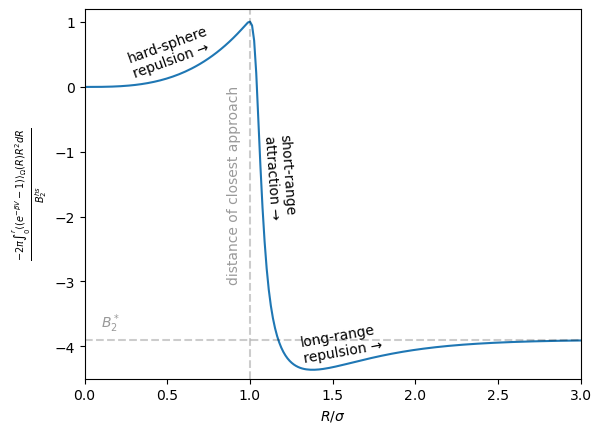

In [4]:
dr = r[1] - r[0]
b2 = -2 * np.pi * (expm1 * r**2).cumsum() * dr
sigma = r[np.argmax(b2)]
m = r <= sigma
b2_hs = -2 * np.pi * trapezoid(expm1[m] * r[m]**2, r[m])

plt.plot(r / sigma, b2 / b2_hs)
plt.xlabel(r"$R / \sigma $")
plt.ylabel(r"$\frac{-2\pi \int_0^r \langle (e^{-\beta V}-1) \rangle_{\Omega}(R) R^2 dR}{B_2^{hs}}$")
plt.vlines(x=1, ymin=-4.5, ymax=1.2,
           color='k', alpha=0.2, linestyle='dashed')
plt.xlim(0,3)
plt.ylim(-4.5, 1.2)
#plt.title("$B_2$ accumulation along mass-center separation")

# Show reduced B2 on graph
b2 = -2 * np.pi * trapezoid(expm1 * r**2, r)
Kd = 1 / (-2 * 6.022e23 * 1e-27 * (b2-b2_hs))
print(f"B2*   = B2 / B2hs = {(b2 / b2_hs):.3f}")
print(f"Sigma = {sigma}")
print(f"Kd    = {Kd:.2e} mol/l")
plt.hlines(y = b2/b2_hs, xmin=0, xmax=3,
           linestyle='dashed', color='k', alpha=0.2)
plt.text(0.1, -3.7, r"$B_2^*$", alpha=0.4)

plt.text(0.86, -3, "distance of closest approach",
         rotation=90, alpha=0.4)
plt.text(0.25, 0.15, "hard-sphere\nrepulsion →", rotation=20, color='k')  #  ↗︎
plt.text(1.07, -2.0, "short-range\nattraction →", rotation=-86, color='k')  #  ↗︎
plt.text(1.3, -4.25, "long-range\nrepulsion →", rotation=10, color='k')  #  ↗︎
plt.show()

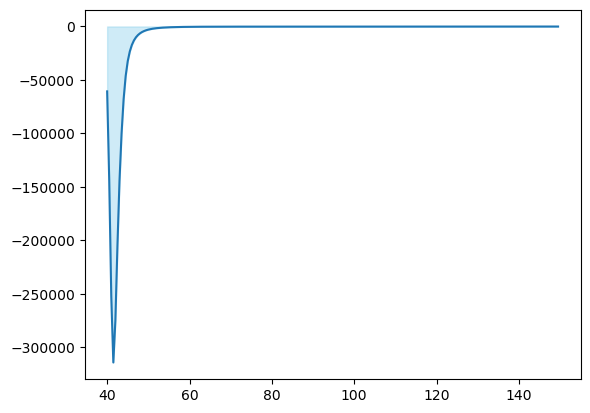

In [48]:
r, F, U, C, expm1 = np.loadtxt("pmf300.dat", unpack=True)
b2_300 = -2 * np.pi * (expm1 * r**2)
r, F, U, C, expm1 = np.loadtxt("pmf330.dat", unpack=True)
b2_330 = -2 * np.pi * (expm1 * r**2)

plt.plot(r, b2_330-b2_300)
plt.fill_between(r, b2_330-b2_300, color='skyblue', alpha=0.4)  # Shade under the curve


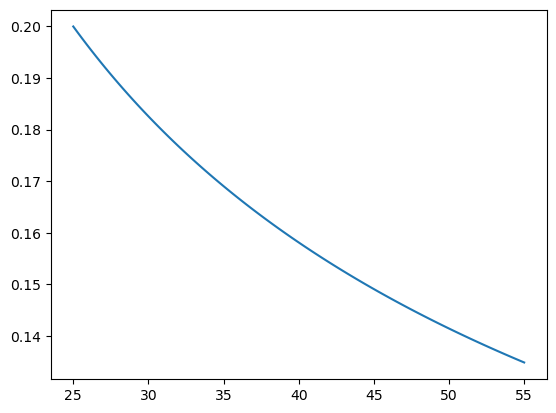

In [71]:
T = np.linspace(25, 55, 100)
a=1
b=88
c=0.4
f1 = T
f2 = 1/np.sqrt(T)
#plt.plot(T, f1)
plt.plot(T, f2)
#plt.plot(T, np.exp(-a/b/T) * np.exp(a/c/T**2))